<a href="https://colab.research.google.com/github/raunaksatone5/Cifar10-neural-network/blob/main/Image_Classification_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification using Neural Networks
### Dataset - CIFAR10

importing required libraries and dependencies

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets

Lets load the data into training and testing sets

In [36]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horses','ship','truck']

reshaping is necessary because we need 1D array to determine the class of the image

In [5]:
y_train = y_train.reshape(-1,)

In [6]:
# function for plotting the image 
def plot_sample(X,y,index):
  plt.figure(figsize = (10,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

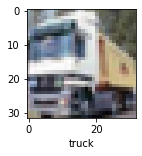

In [7]:
plot_sample(X_train,y_train,1)

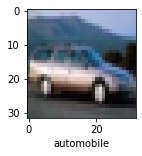

In [8]:
plot_sample(X_train,y_train,4)

Normalizing the training data

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Building simple artificial neural network for image classification

In [10]:
from tensorflow.keras import models, layers

In [11]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train,y_train,epochs=5)


Epoch 1/5
1563/1563 [==============================] - 106s 67ms/step - loss: 1.8092 - accuracy: 0.3545
Epoch 2/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6230 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5395 - accuracy: 0.4571
Epoch 4/5
1563/1563 [==============================] - 132s 84ms/step - loss: 1.4807 - accuracy: 0.4784
Epoch 5/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.4288 - accuracy: 0.4980


After 5 epochs we got accuracy as 0.4979

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(print("Classification Report: \n", classification_report(y_test, y_pred_classes)))

313/313 [==============================] - 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.58      0.54      1000
           1       0.51      0.71      0.59      1000
           2       0.42      0.29      0.34      1000
           3       0.37      0.32      0.34      1000
           4       0.50      0.35      0.41      1000
           5       0.41      0.33      0.37      1000
           6       0.58      0.44      0.50      1000
           7       0.52      0.57      0.55      1000
           8       0.51      0.68      0.59      1000
           9       0.47      0.58      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000

None


Lets try using CNN 

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [15]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5131 - accuracy: 0.4524
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1390 - accuracy: 0.6002
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9998 - accuracy: 0.6502
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9161 - accuracy: 0.6815
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8492 - accuracy: 0.7062
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8024 - accuracy: 0.7197
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7539 - accuracy: 0.7378
Epoch 8/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7123 - accuracy: 0.7544
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6762 - accuracy: 0.7662
Epoch 10/10
1563/1563 [==============================] - 67s 43m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [16]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9109 - accuracy: 0.7003


[0.910896897315979, 0.7002999782562256]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[7.5967647e-03, 8.5859204e-04, 1.7201441e-03, 5.2167082e-01,
        1.3945569e-04, 9.1090649e-03, 1.0081871e-02, 7.7241006e-05,
        4.4870421e-01, 4.1848562e-05],
       [1.0612762e-02, 7.5753167e-02, 2.9445539e-06, 3.7503480e-07,
        4.2342594e-07, 1.1442252e-08, 1.7924076e-07, 1.8817998e-09,
        9.1202295e-01, 1.6071324e-03],
       [4.0050140e-01, 7.1655519e-02, 9.1102847e-04, 3.5463748e-03,
        2.7501379e-04, 1.0906146e-04, 1.8644575e-03, 2.4272290e-03,
        4.4681972e-01, 7.1890153e-02],
       [8.5800016e-01, 6.6373516e-03, 3.1040451e-03, 2.0270461e-04,
        1.1247715e-04, 1.2834995e-06, 7.8303572e-05, 4.7758815e-05,
        1.2904738e-01, 2.7685664e-03],
       [4.1885996e-06, 1.2372324e-05, 7.3293778e-03, 2.5291729e-03,
        1.0797104e-02, 2.2449400e-04, 9.7908485e-01, 7.0899567e-08,
        1.8199342e-05, 2.4930955e-07]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [19]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [37]:
y_test = y_test.reshape(-1,)

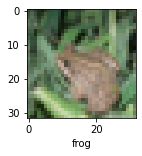

In [38]:
plot_sample(X_test, y_test,4)

In [26]:
classes[y_classes[4]]

'frog'

In [27]:
classes[y_classes[4]]

'frog'

Since CNN's are meant to perform best on the image data whike ANN's are good for tabular or text data, we can see that through the accuracies we are getting.